## MRI and Alzheimer's Analysis

This notebook aims to explore and analyze magnetic resonance imaging (MRI) data of individuals in relation to Alzheimer's disease.
The data was obtained from the Open Access Series of Imaging Studies (OASIS), a project that provides brain MRI datasets to the scientific community.

The dataset includes both cross-sectional and longitudinal MRI data, spanning a wide range of ages and health states of individuals.

We will perform the following steps in this notebook:

1. Data preprocessing.
2. Exploratory analysis to understand the distribution of features.
3. Building machine learning models for tasks related to Alzheimer's, such as diagnosis and disease progression prediction.
4. Evaluating model performance and interpreting the results.

## Alzheimer's Disease Overview:

Alzheimer's disease is a progressive neurodegenerative disorder characterized by the gradual deterioration of cognitive functions, particularly memory and thinking abilities. It is the most common cause of dementia among the elderly.


### Key Features:

**Memory Loss:** Individuals with Alzheimer's experience persistent memory loss, especially in recent events.

**Cognitive Decline:** There is a gradual decline in thinking, reasoning, and problem-solving abilities.

**Behavioral Changes:** Alzheimer's can lead to changes in behavior, mood swings, and difficulty in performing routine tasks.


### Pathology:

Alzheimer's is associated with the accumulation of abnormal protein deposits, including beta-amyloid plaques and tau tangles, in the brain.
These deposits interfere with communication between brain cells, leading to cell death and the characteristic brain atrophy seen in Alzheimer's patients.


### Impact on MRI Data Analysis:

Magnetic Resonance Imaging (MRI) plays a crucial role in Alzheimer's research, allowing for the examination of structural brain changes over time.
Longitudinal MRI data helps in understanding disease progression and identifying biomarkers associated with Alzheimer's.

## Dataset Columns:

ID: Unique identifier for each individual in the dataset.

M/F: Gender of the individual, where "M" may represent male and "F" female.

Hand: Information about the individual's hand dominance (e.g., right or left-handed).

Age: Age of the individual.

Educ: Educational level of the individual.

SES: Socioeconomic status of the individual.

MMSE: Mini-Mental State Examination (MMSE).

CDR: Clinical Dementia Rating (CDR).

eTIV: Estimated Total Intracranial Volume.

nWBV: Normalized Whole Brain Volume.

ASF: Atlas Scaling Factor.

These columns encompass a combination of demographic information (age, gender, education, socioeconomic status) and clinical measures relevant to cognitive assessment and brain structure.

In [104]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')

In [109]:
# Load the data from the .csv file

data = pd.read_csv('oasis_cross-sectional.csv')

In [112]:
# View the first few rows of the dataset to understand its structure

print(data.head())

              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [113]:
# Basic information about the dataset, such as the number of rows, columns, data types, and missing values

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None


In [114]:
# Descriptive statistics of numeric variables

print(data.describe())

              Age        Educ         SES       MMSE         CDR         eTIV  \
count  436.000000  235.000000  216.000000  235.00000  235.000000   436.000000   
mean    51.357798    3.178723    2.490741   27.06383    0.285106  1481.919725   
std     25.269862    1.311510    1.120593    3.69687    0.383405   158.740866   
min     18.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     23.000000    2.000000    2.000000   26.00000    0.000000  1367.750000   
50%     54.000000    3.000000    2.000000   29.00000    0.000000  1475.500000   
75%     74.000000    4.000000    3.000000   30.00000    0.500000  1579.250000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF     Delay  
count  436.000000  436.000000  20.00000  
mean     0.791670    1.198894  20.55000  
std      0.059937    0.128682  23.86249  
min      0.644000    0.881000   1.00000  
25%      0.742750    1.111750   2.75000  
50%      0.809000 

In [115]:
# Check for missing values

print(data.isnull().sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


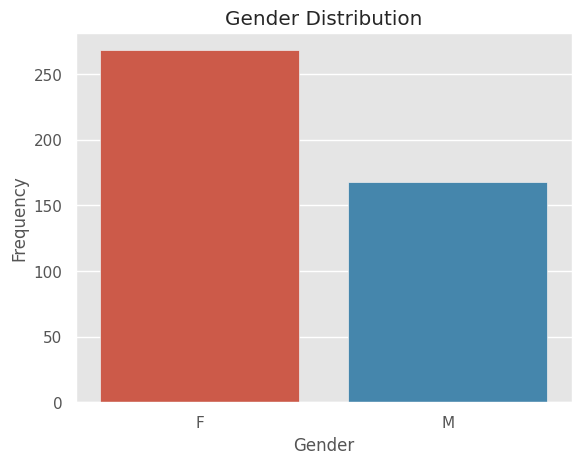

In [119]:
# Visualization of 'M/F' (gender) distribution

sns.countplot(x='M/F', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

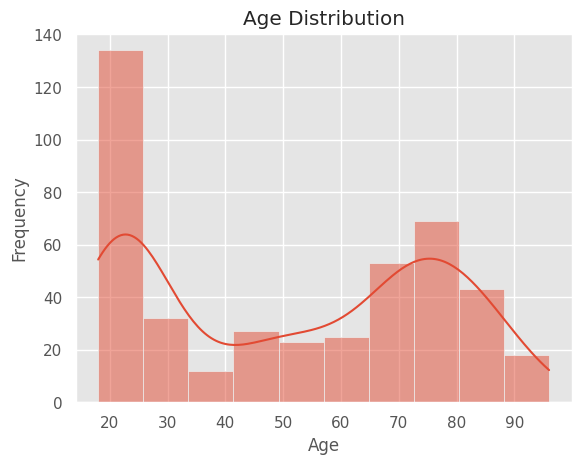

In [120]:
# Visualization of 'Age' distribution

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [121]:
# Fill the null values in the 'Educ' column with the mean

mean_educ = data['Educ'].mean()
data['Educ'].fillna(mean_educ, inplace=True)

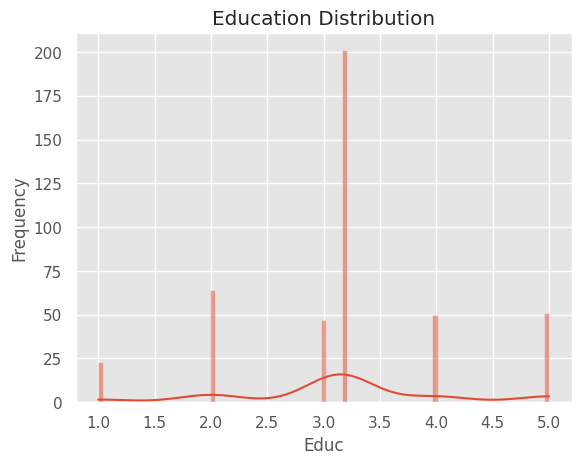

In [122]:
# Visualization of 'Educ' distribution

sns.histplot(data['Educ'], kde=True)
plt.title('Education Distribution')
plt.xlabel('Educ')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Fill the null values in the 'SES' column with the mean of 'SES'

mean_ses = data['SES'].mean()
data['SES'].fillna(mean_ses, inplace=True)

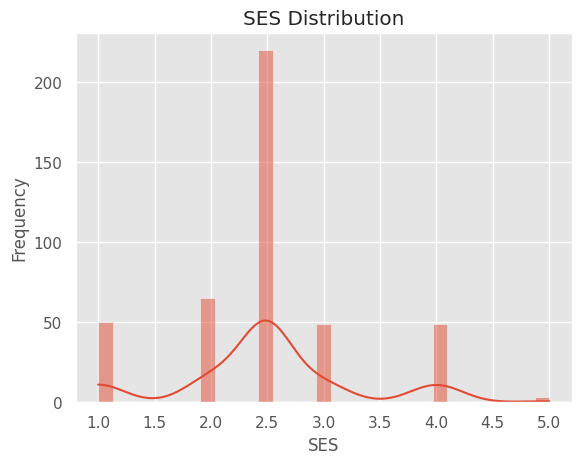

In [62]:
# Visualization of SES (Socioeconomic status of the individual) distribution

sns.histplot(data['SES'], kde=True)
plt.title('SES Distribution')
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Fill the null values in the 'MMSE' (Mini-Mental State Examination) column with the mean of 'MMSE'

mean_mmse = data['MMSE'].mean()
data['MMSE'].fillna(mean_mmse, inplace=True)

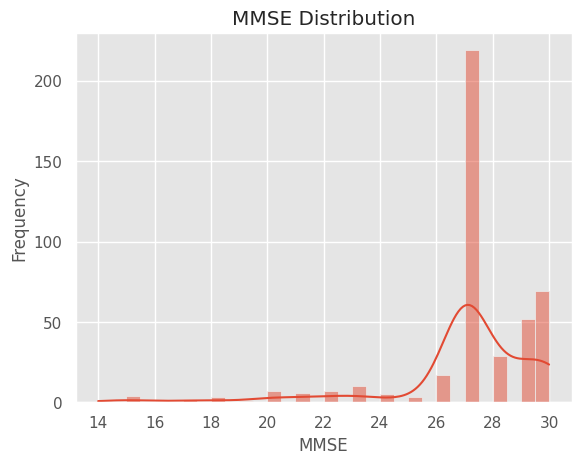

In [64]:
# Visualization of MMSE (Mini-Mental State Examination) distribution

sns.histplot(data['MMSE'], kde=True)
plt.title('MMSE Distribution')
plt.xlabel('MMSE')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Fill the null values in the 'CDR' (Clinical Dementia Rating) column with the mean of 'CDR'

cdr_mean = data['CDR'].mean()
data['CDR'].fillna(cdr_mean, inplace=True)

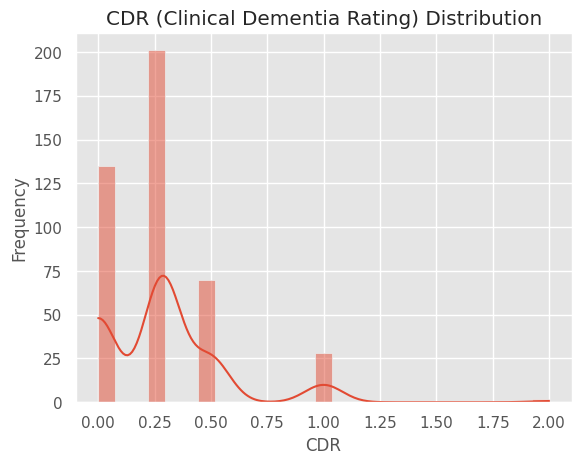

In [68]:
# Visualization of 'CDR' (Clinical Dementia Rating) column with the mean of 'CDR'

sns.histplot(data['CDR'], kde=True)
plt.title('CDR (Clinical Dementia Rating) Distribution')
plt.xlabel('CDR')
plt.ylabel('Frequency')
plt.show()

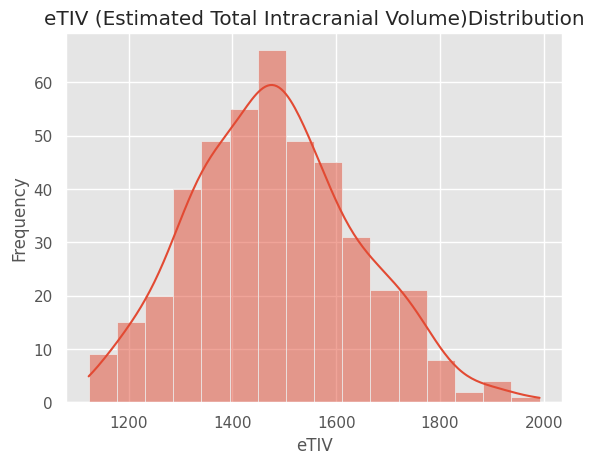

In [70]:
# Visualization of 'eTIV' (Estimated Total Intracranial Volume) Distribution'

sns.histplot(data['eTIV'], kde=True)
plt.title('eTIV (Estimated Total Intracranial Volume)Distribution')
plt.xlabel('eTIV')
plt.ylabel('Frequency')
plt.show()

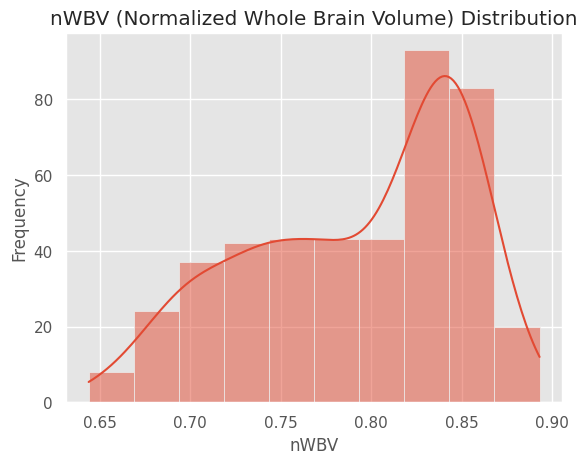

In [71]:
# Visualization of 'nWBV' (Normalized Whole Brain Volume) Distribution'

sns.histplot(data['nWBV'], kde=True)
plt.title('nWBV (Normalized Whole Brain Volume) Distribution')
plt.xlabel('nWBV')
plt.ylabel('Frequency')
plt.show()

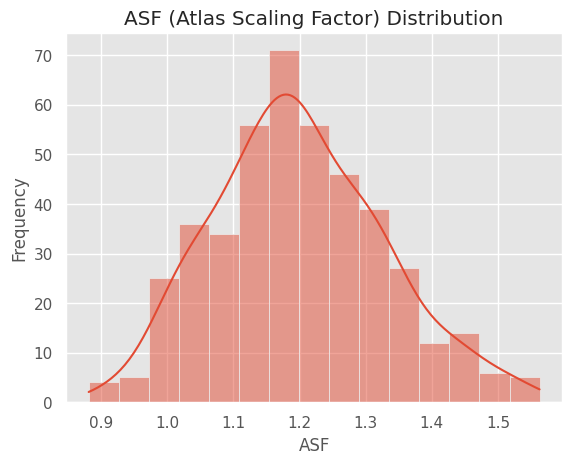

In [74]:
# Visualization of 'ASF' (Atlas Scaling Factor) Distribution'

sns.histplot(data['ASF'], kde=True)
plt.title('ASF (Atlas Scaling Factor) Distribution')
plt.xlabel('ASF')
plt.ylabel('Frequency')
plt.show()

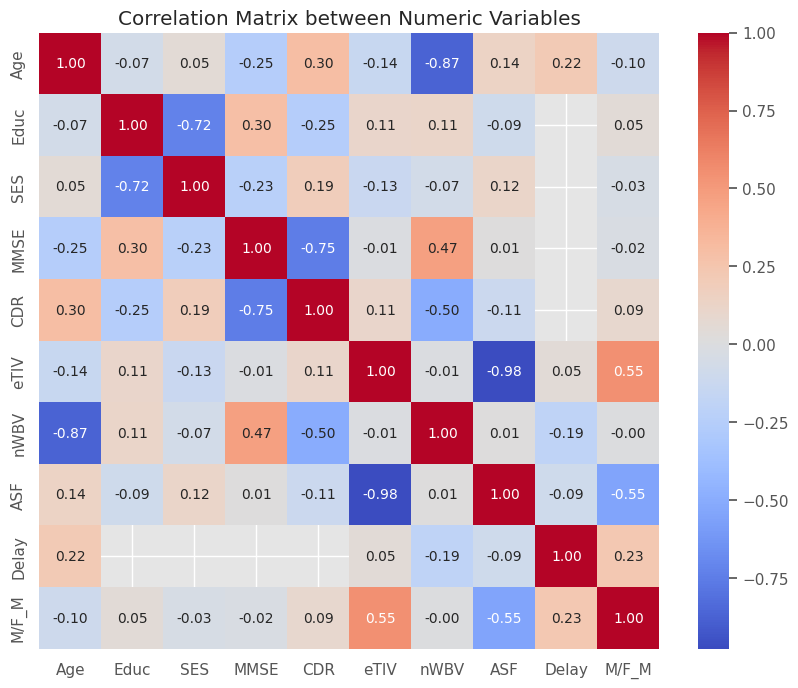

In [30]:
# Correlation between numeric variables

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numeric Variables')
plt.show()

In [157]:
# Features (X) e rótulos (y)

X = data[['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['CDR']

In [158]:
# Dividing the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Normalization of features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
# Create an imputer to fill NaN values with the mean

imputer = SimpleImputer(strategy='mean')

# Apply imputation to the training data

X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# # Apply imputation to the test data

X_test_scaled_imputed = imputer.transform(X_test_scaled)

In [163]:
# Set a threshold (for example, 0.5) to convert to binary
threshold = 0.5

# Convert continuous values to binaries for 'CDR'
data['CDR'] = (data['CDR'] > threshold).astype(int)

# Convert labels to a format suitable for binary classification
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Convert continuous values to binaries for 'y_train' and 'y_test'
y_train_encoded = (y_train > threshold).astype(int)
y_test_encoded = (y_test > threshold).astype(int)


In [164]:
# Initialize the classification model (Random Forest)

model = RandomForestClassifier(random_state=42)

In [165]:
# Training the model

model.fit(X_train_scaled_imputed, y_train_encoded)

RandomForestClassifier(random_state=42)

In [166]:
# Invert the encoding to obtain the original labels

y_pred = le.inverse_transform(y_pred_encoded)

In [167]:
# Model Evaluation

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy}')

print('Classification Report:\n', classification_report(y_test_encoded, y_pred_encoded))
print('Confusion Matrix:\n', confusion_matrix(y_test_encoded, y_pred_encoded))

Accuracy: 0.9318181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.25      0.40         8

    accuracy                           0.93        88
   macro avg       0.97      0.62      0.68        88
weighted avg       0.94      0.93      0.91        88

Confusion Matrix:
 [[80  0]
 [ 6  2]]
